### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

In [121]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
import pandas as pd
data = pd.read_csv('prev-labs/lab3/titanic.csv')
data

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,14.4542,C
1305,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,0,3,"Zakarian, Mr. Mapriededer",male,26.50,0,0,7.2250,C
1307,0,3,"Zakarian, Mr. Ortin",male,27.00,0,0,7.2250,C


#### Preprocess the data as it has been done in the lab, feel free to adapt

In [123]:
#### preprocess the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


imputer = SimpleImputer(strategy='most_frequent')
data.loc[:, :] = imputer.fit_transform(data)

ss = StandardScaler()
data.loc[:, ['fare', 'age']] = ss.fit_transform(data.loc[:, ['fare', 'age']])

onehot = OneHotEncoder()
features = ['pclass', 'embarked', 'sex']
onehot.fit(data[features])
tranformed = onehot.transform(data[features]).toarray()
tranformed = pd.DataFrame(tranformed, dtype=int, columns=onehot.get_feature_names(features))
data = pd.concat([data, tranformed], axis=1) 
data.drop(columns=features, inplace=True)

data.drop(columns=['name'], inplace=True)
data.head()

/home/yy7/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0.022951,0,0,3.442540,1,0,0,0,0,1,1,0
1,1,-2.121855,1,2,2.286641,1,0,0,0,0,1,0,1
2,0,-2.039362,1,2,2.286641,1,0,0,0,0,1,1,0
3,0,0.099333,1,2,2.286641,1,0,0,0,0,1,0,1
4,0,-0.282577,1,2,2.286641,1,0,0,0,0,1,1,0


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

In [152]:
### write your code here 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score


survived = data[data.survived == 1]
died = data[data.survived == 0]

def divide(p1, p2, survived, died):
    n = len(survived.index) + len(died.index)
    n = n/2
    print(f"from {len(survived.index)} # of survived choose {int(n*p1)}")
    print(f"from {len(died.index)} # of dead choose {int(n*p2)}")
    print(f"{int(n*p1)}/{int(n*p1)+int(n*p2)} = {int(n*p1)/(int(n*p1)+int(n*p2))}")
    d = died.iloc[0:int(n * p1), :] 
    s = survived.iloc[0:int(n * p2), :] 
    return pd.concat([d, s])

proportions = [(0.2, 0.8), (0.3, 0.7), (0.4, 0.6)]
accuracy_scores = []
for p1, p2 in proportions:
    print(f"\nFor proportions: {p1 * 100}% x {p2 * 100}%\n")
    dff = divide(p1, p2, survived, died)    
    x_train, x_test, y_train, y_test = train_test_split(dff.loc[:, dff.columns != 'survived'], dff['survived'])
    lr = LogisticRegression()
    lr.fit(x_train.astype(int), y_train.astype(int))
    y_pred = lr.predict(x_test.astype(int))
    y_test = y_test.astype(int)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    accuracy_scores.append((p1, p2, (y_test, y_pred,),))


For proportions: 20.0% x 80.0%

from 500 # of survived choose 130
from 809 # of dead choose 523
130/653 = 0.1990811638591118
Accuracy: 0.8987341772151899
Precision: 0.9823008849557522
Recall: 0.888

For proportions: 30.0% x 70.0%

from 500 # of survived choose 196
from 809 # of dead choose 458
196/654 = 0.2996941896024465
Accuracy: 0.8536585365853658
Precision: 0.9351851851851852
Recall: 0.8559322033898306

For proportions: 40.0% x 60.0%

from 500 # of survived choose 261
from 809 # of dead choose 392
261/653 = 0.3996937212863706
Accuracy: 0.8780487804878049
Precision: 0.9523809523809523
Recall: 0.8333333333333334


## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

[0.888, 0.8559322033898306, 0.8333333333333334]


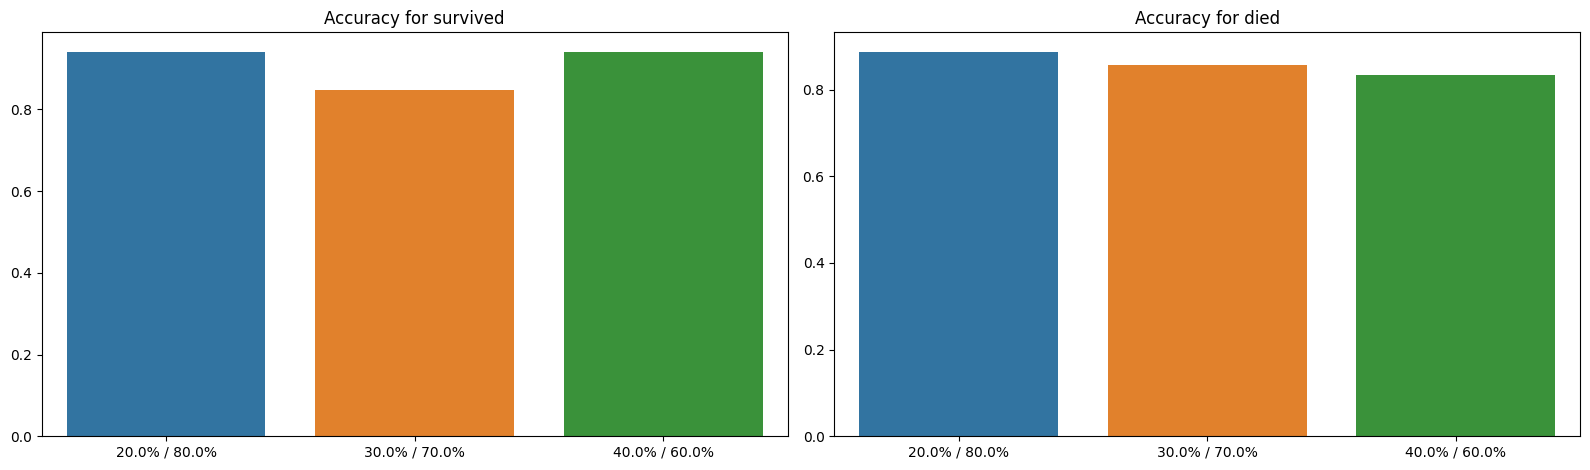

In [153]:
#### write your code 
from matplotlib import pyplot as plt
import seaborn as sns

accuracy_0 = []
accuracy_1 = []

for p1, p2, (y_test, y_pred) in accuracy_scores:
        accuracy_0.append(((y_pred == 0) & (y_test == 0)).sum() / (y_test == 0).sum())
        accuracy_1.append(((y_pred == 1) & (y_test == 1)).sum() / (y_test == 1).sum())
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(16)
print(accuracy_1)
sns.barplot(x=list(map(lambda x: f"{x[0]*100}% / {x[1]*100}%", proportions)), y=accuracy_0, ax=ax[0])
sns.barplot(x=list(map(lambda x: f"{x[0]*100}% / {x[1]*100}%", proportions)), y=accuracy_1, ax=ax[1])
ax[0].set_title("Accuracy for survived")
ax[1].set_title("Accuracy for died")
plt.tight_layout()
plt.show()

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

`Write your report here`